In [1]:
import numpy as np 
import pandas as pd 
from keras.datasets.cifar10 import load_data 
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential 
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from matplotlib import pyplot as plt 
from numpy.random import randn
from numpy.random import randint
from numpy import zeros
from numpy import ones

In [2]:
(train_X, train_y), (test_X, test_y) = load_data()

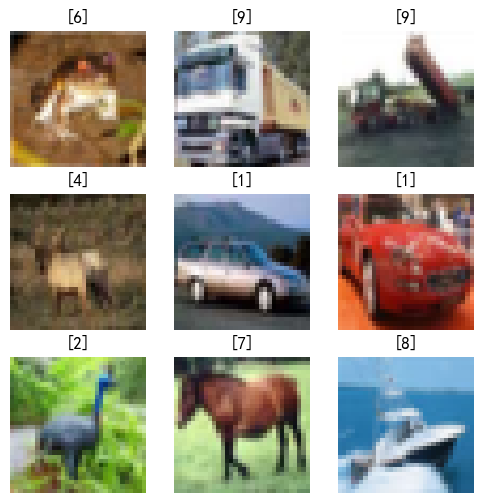

In [3]:
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(train_X[i])
    plt.title(str(train_y[i]))
plt.show()

In [4]:
def Discriminator(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Discriminator = Discriminator()
print(Discriminator.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8

In [5]:
def Generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (8, 8), activation='tanh', padding='same'))
    return model 

Generator = Generator(100)
print(Generator.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

In [6]:
def GAN(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def load_real_samples():
    (train_X, _), (_, _) = load_data()
    X = train_X.astype('float32')
    X = (X - 127.5) / 127.5
    return X

def generate_real_samples(dataset, n_samples):
    idx = randint(0, dataset.shape[0], n_samples)
    X = dataset[idx]
    y = ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    X_input = randn(latent_dim * n_samples)
    X_input = X_input.reshape(n_samples, latent_dim)
    return X_input

def generate_fake_samples(generator, latent_dim, n_samples):
    X_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(X_input)
    y = zeros((n_samples, 1))
    return X, y

Epoch>1, Batch [50/781], d1=0.335, d2=0.625, g=0.818


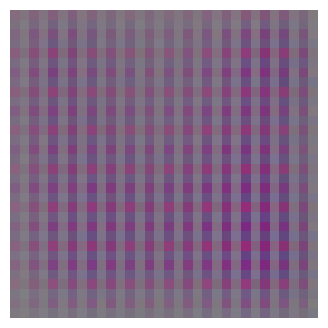

Epoch>1, Batch [100/781], d1=0.299, d2=0.452, g=1.166


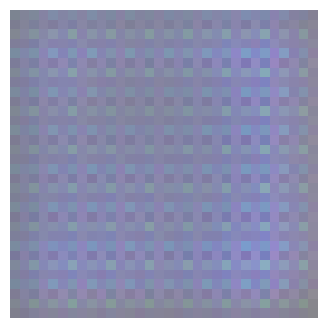

Epoch>1, Batch [150/781], d1=0.223, d2=0.904, g=1.145


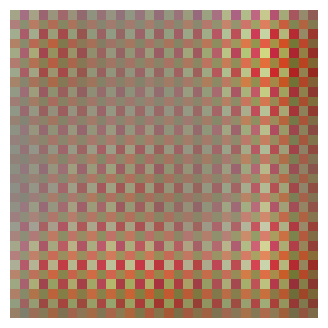

Epoch>1, Batch [200/781], d1=0.616, d2=0.308, g=1.548


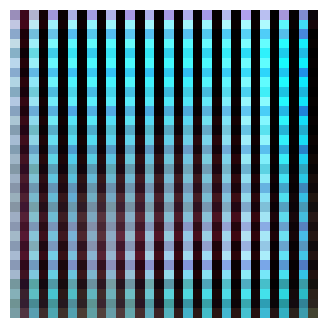

Epoch>1, Batch [250/781], d1=0.642, d2=0.229, g=1.943


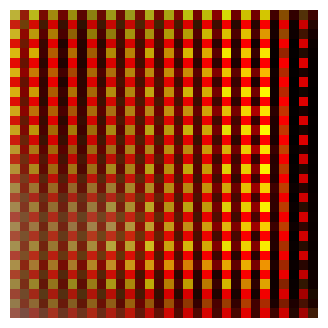

Epoch>1, Batch [300/781], d1=0.470, d2=0.511, g=1.068


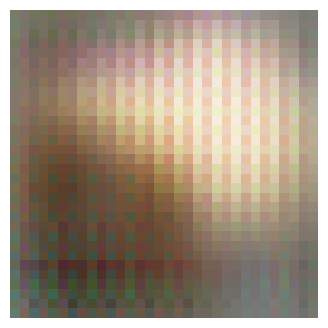

Epoch>1, Batch [350/781], d1=0.574, d2=0.549, g=1.235


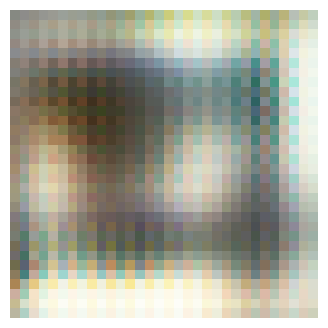

Epoch>1, Batch [400/781], d1=0.642, d2=0.798, g=0.903


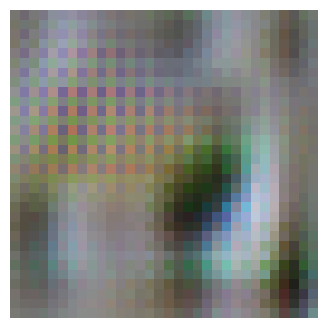

Epoch>1, Batch [450/781], d1=0.638, d2=0.585, g=0.975


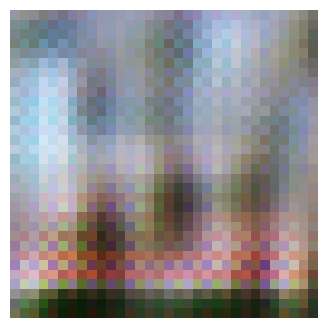

Epoch>1, Batch [500/781], d1=0.494, d2=0.900, g=0.808


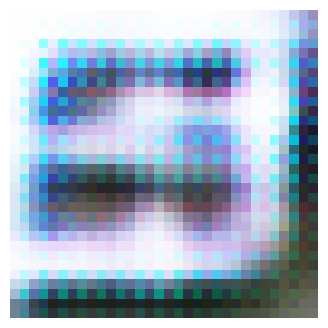

Epoch>1, Batch [550/781], d1=0.801, d2=0.519, g=1.201


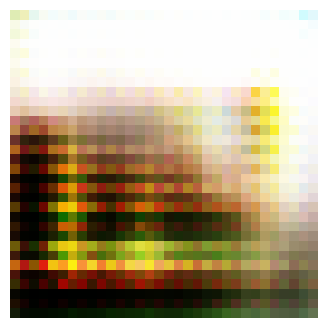

Epoch>1, Batch [600/781], d1=0.595, d2=0.851, g=0.722


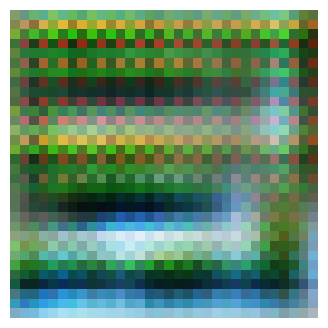

Epoch>1, Batch [650/781], d1=0.712, d2=0.511, g=1.006


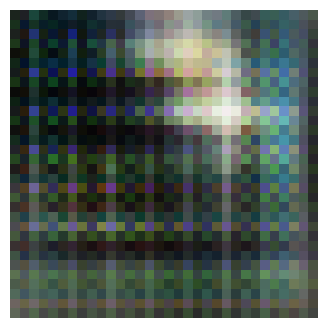

Epoch>1, Batch [700/781], d1=0.732, d2=0.603, g=0.892


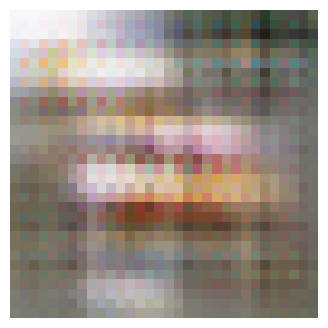

Epoch>1, Batch [750/781], d1=0.742, d2=0.695, g=0.806


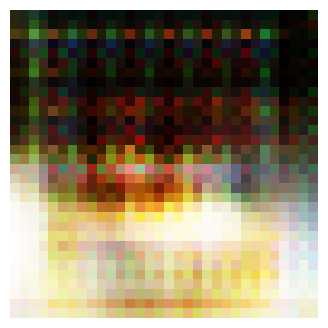

Epoch>2, Batch [50/781], d1=0.746, d2=0.523, g=1.021


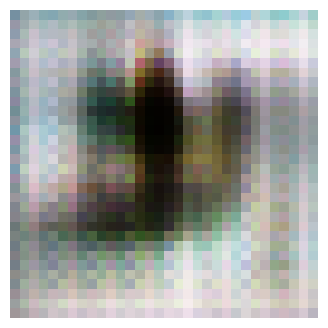

Epoch>2, Batch [100/781], d1=0.677, d2=0.583, g=0.891


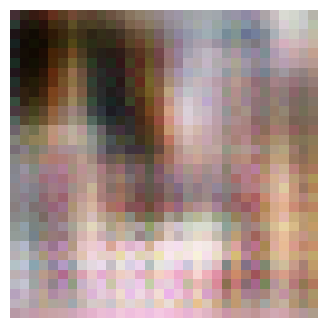

Epoch>2, Batch [150/781], d1=0.645, d2=0.676, g=0.828


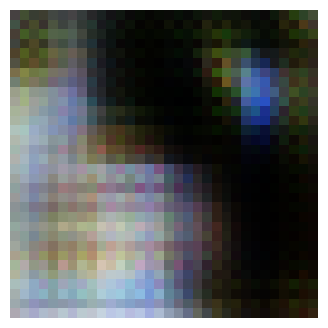

Epoch>2, Batch [200/781], d1=0.592, d2=0.720, g=0.830


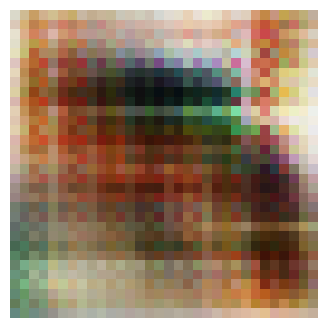

Epoch>2, Batch [250/781], d1=0.692, d2=0.738, g=0.763


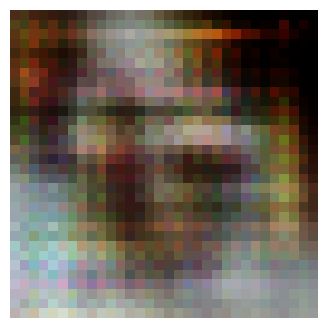

Epoch>2, Batch [300/781], d1=0.551, d2=0.713, g=0.757


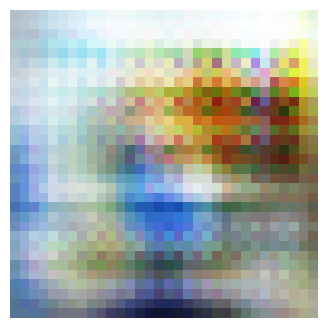

Epoch>2, Batch [350/781], d1=0.718, d2=0.659, g=0.760


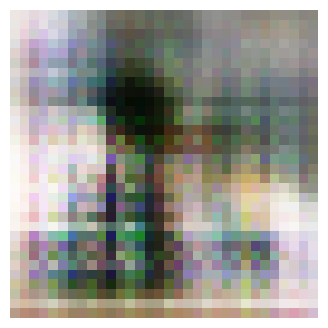

Epoch>2, Batch [400/781], d1=0.667, d2=0.619, g=0.836


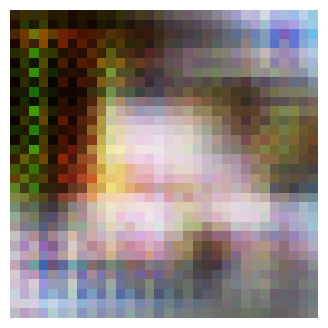

Epoch>2, Batch [450/781], d1=0.616, d2=0.816, g=0.625


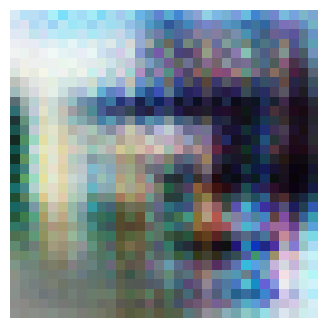

Epoch>2, Batch [500/781], d1=0.726, d2=0.587, g=0.819


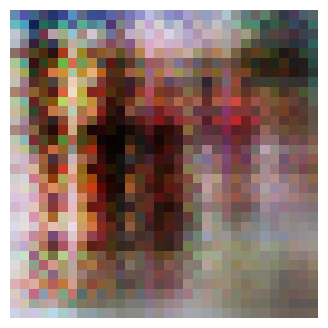

Epoch>2, Batch [550/781], d1=0.713, d2=0.545, g=0.868


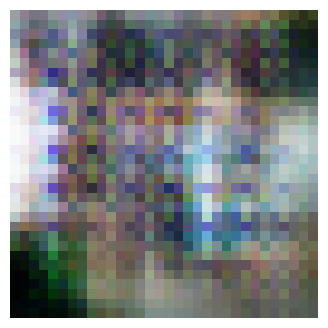

Epoch>2, Batch [600/781], d1=0.626, d2=0.696, g=0.784


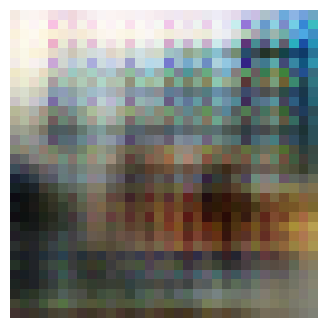

Epoch>2, Batch [650/781], d1=0.751, d2=0.820, g=0.716


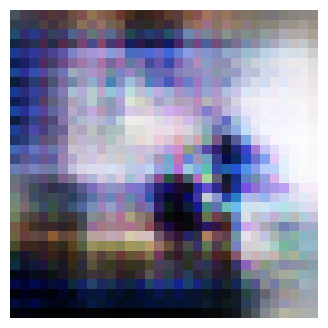

Epoch>2, Batch [700/781], d1=0.706, d2=0.670, g=0.774


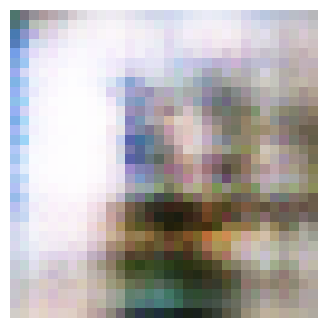

Epoch>2, Batch [750/781], d1=0.685, d2=0.639, g=0.808


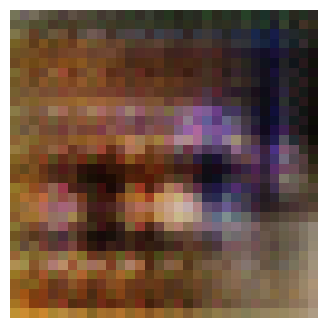

Epoch>3, Batch [50/781], d1=0.611, d2=0.799, g=0.699


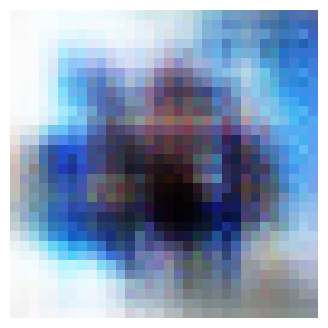

Epoch>3, Batch [100/781], d1=0.654, d2=0.680, g=0.743


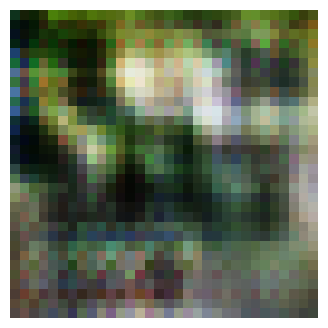

Epoch>3, Batch [150/781], d1=0.708, d2=0.587, g=0.854


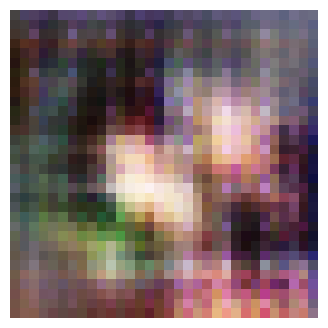

Epoch>3, Batch [200/781], d1=0.667, d2=0.669, g=0.897


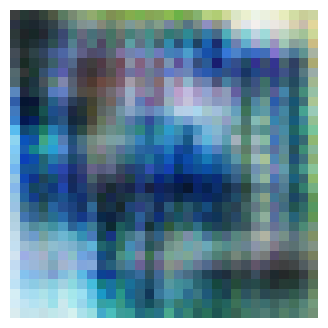

Epoch>3, Batch [250/781], d1=0.594, d2=0.719, g=0.729


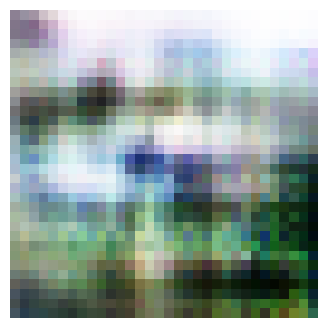

Epoch>3, Batch [300/781], d1=0.727, d2=0.655, g=0.804


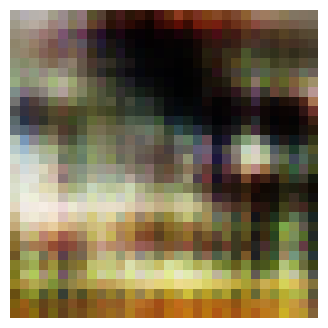

Epoch>3, Batch [350/781], d1=0.676, d2=0.756, g=0.715


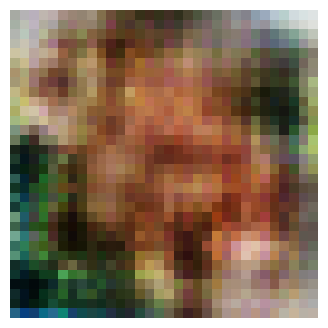

Epoch>3, Batch [400/781], d1=0.660, d2=0.598, g=0.896


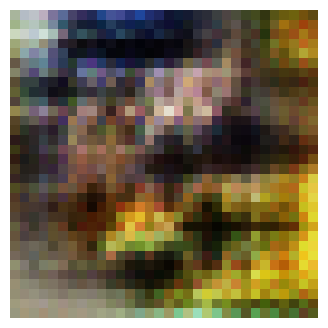

Epoch>3, Batch [450/781], d1=0.715, d2=0.722, g=0.724


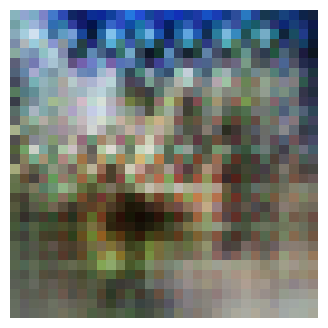

Epoch>3, Batch [500/781], d1=0.674, d2=0.669, g=0.756


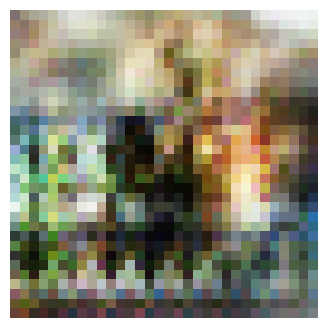

Epoch>3, Batch [550/781], d1=0.657, d2=0.647, g=0.774


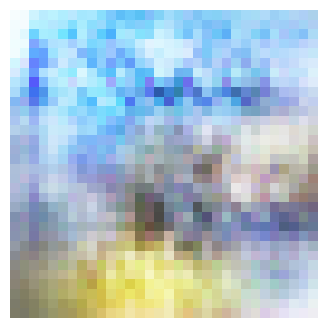

Epoch>3, Batch [600/781], d1=0.694, d2=0.715, g=0.741


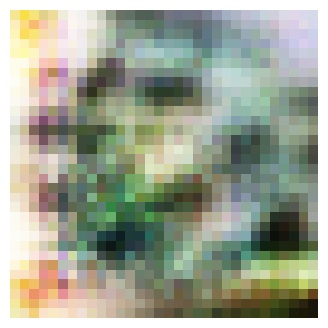

Epoch>3, Batch [650/781], d1=0.792, d2=0.611, g=0.862


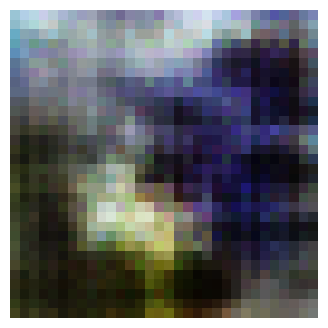

Epoch>3, Batch [700/781], d1=0.662, d2=0.690, g=0.739


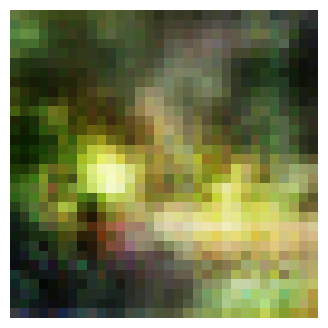

Epoch>3, Batch [750/781], d1=0.721, d2=0.722, g=0.711


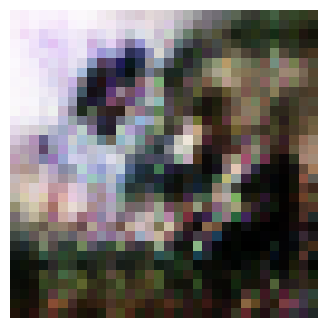

Epoch>4, Batch [50/781], d1=0.732, d2=0.736, g=0.688


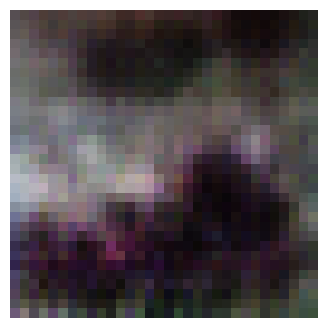

Epoch>4, Batch [100/781], d1=0.732, d2=0.580, g=0.883


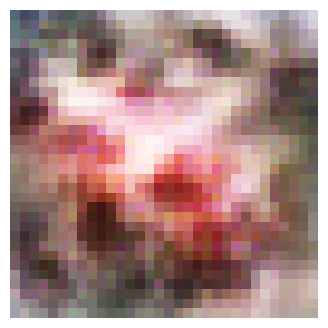

Epoch>4, Batch [150/781], d1=0.615, d2=0.623, g=0.818


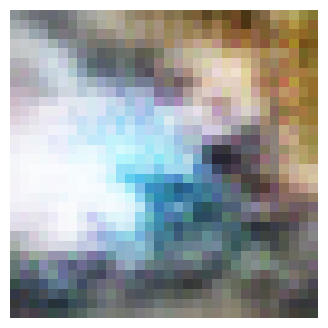

Epoch>4, Batch [200/781], d1=0.695, d2=0.762, g=0.653


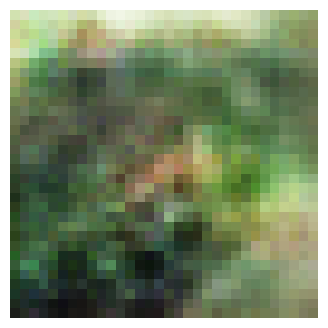

Epoch>4, Batch [250/781], d1=0.557, d2=0.858, g=0.691


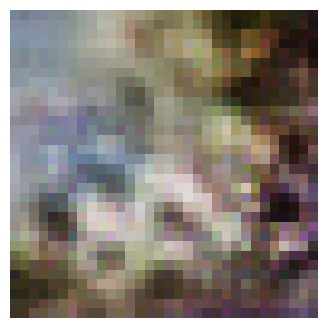

Epoch>4, Batch [300/781], d1=0.638, d2=0.631, g=0.787


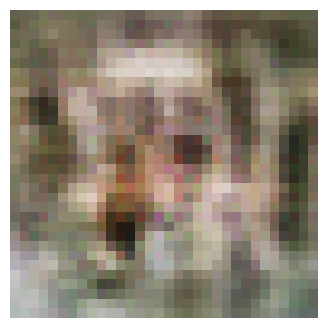

Epoch>4, Batch [350/781], d1=0.748, d2=0.652, g=0.816


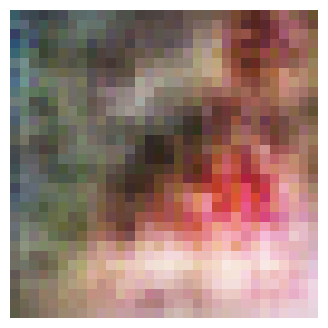

Epoch>4, Batch [400/781], d1=0.802, d2=0.610, g=0.954


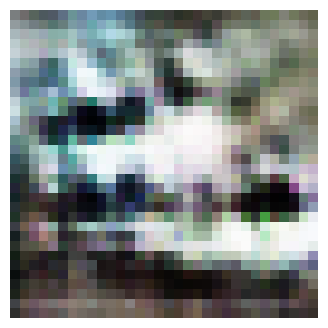

Epoch>4, Batch [450/781], d1=0.642, d2=0.750, g=0.717


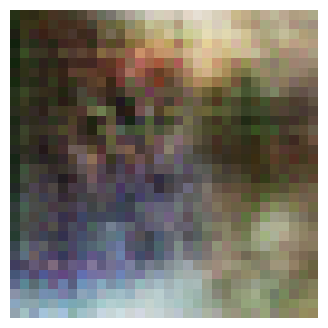

Epoch>4, Batch [500/781], d1=0.763, d2=0.580, g=0.988


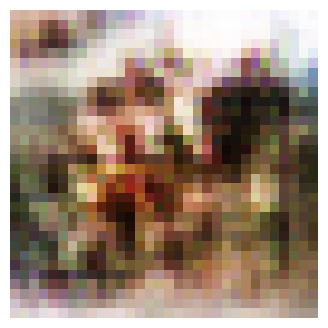

Epoch>4, Batch [550/781], d1=0.640, d2=0.643, g=0.850


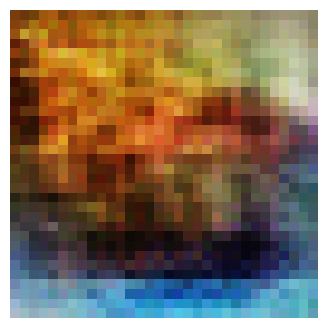

Epoch>4, Batch [600/781], d1=0.646, d2=0.473, g=1.138


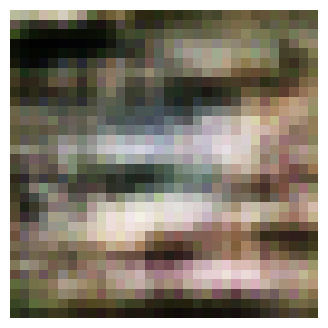

Epoch>4, Batch [650/781], d1=0.616, d2=0.606, g=0.837


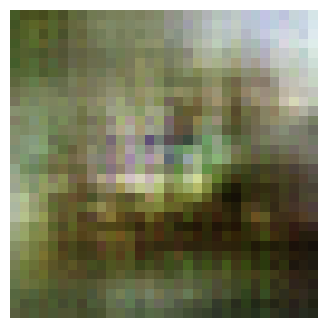

Epoch>4, Batch [700/781], d1=0.786, d2=0.554, g=0.903


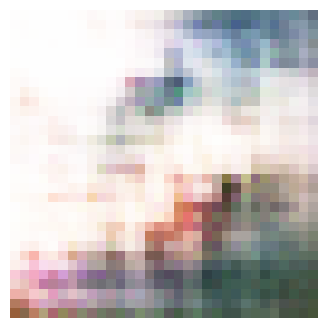

Epoch>4, Batch [750/781], d1=0.638, d2=0.671, g=0.742


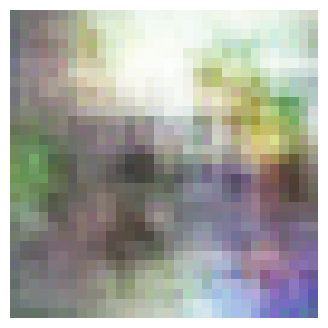

Epoch>5, Batch [50/781], d1=0.670, d2=0.910, g=0.607


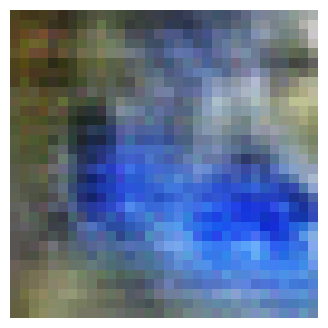

Epoch>5, Batch [100/781], d1=0.610, d2=0.780, g=0.697


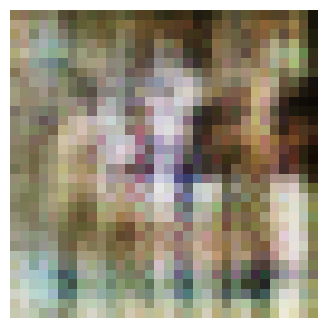

Epoch>5, Batch [150/781], d1=0.721, d2=0.948, g=0.609


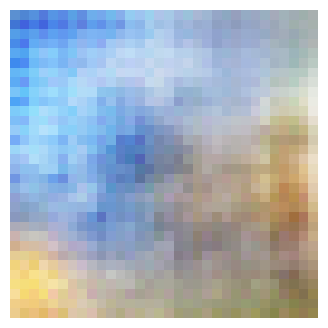

Epoch>5, Batch [200/781], d1=0.690, d2=0.613, g=0.848


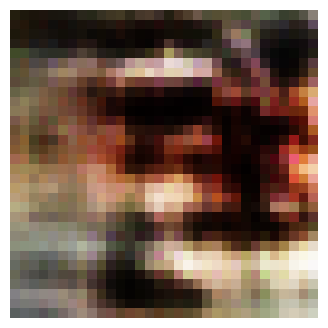

Epoch>5, Batch [250/781], d1=0.717, d2=0.663, g=0.809


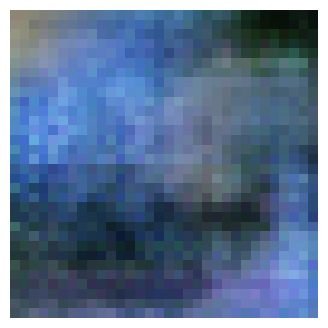

Epoch>5, Batch [300/781], d1=0.647, d2=0.660, g=0.772


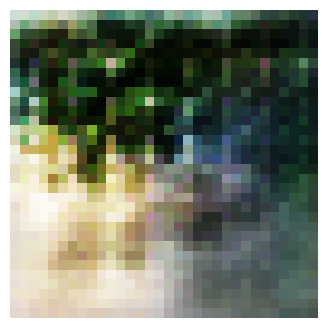

Epoch>5, Batch [350/781], d1=0.683, d2=0.682, g=0.725


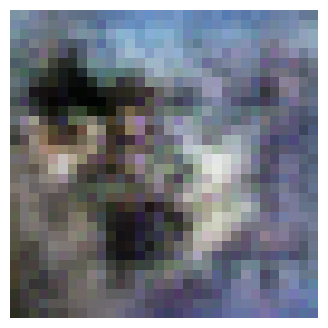

Epoch>5, Batch [400/781], d1=0.666, d2=0.695, g=0.731


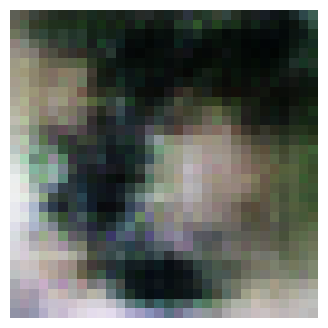

Epoch>5, Batch [450/781], d1=0.701, d2=0.616, g=0.779


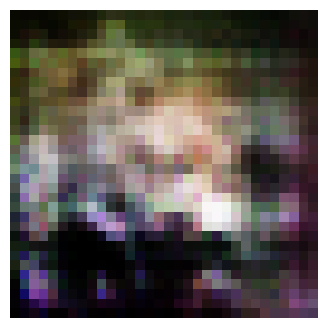

Epoch>5, Batch [500/781], d1=0.734, d2=0.738, g=0.714


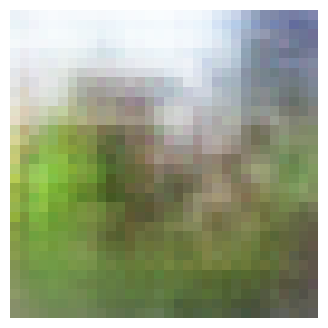

Epoch>5, Batch [550/781], d1=0.712, d2=0.645, g=0.794


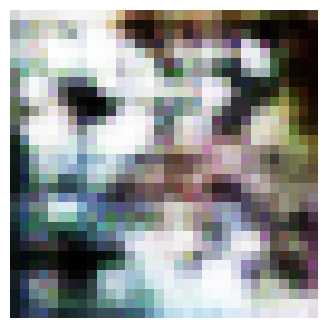

Epoch>5, Batch [600/781], d1=0.796, d2=0.682, g=0.751


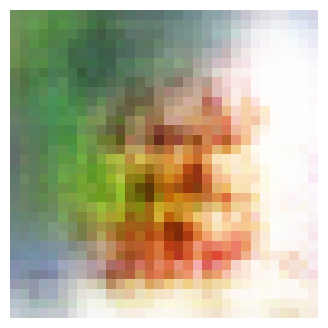

Epoch>5, Batch [650/781], d1=0.689, d2=0.715, g=0.711


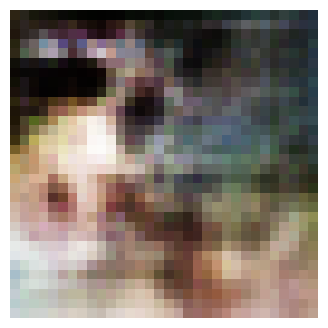

Epoch>5, Batch [700/781], d1=0.743, d2=0.703, g=0.727


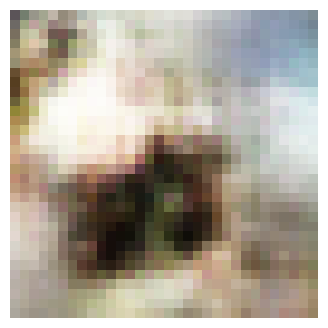

Epoch>5, Batch [750/781], d1=0.715, d2=0.672, g=0.730


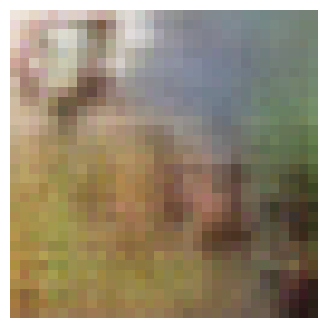

In [7]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=64):
    batch_per_epoch = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss_real, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            if (j + 1) % 50 == 0:
                print('Epoch>%d, Batch [%d/%d], d1=%.3f, d2=%.3f, g=%.3f'%(i + 1, j + 1, batch_per_epoch, d_loss_real, d_loss_fake, g_loss))
                plt.figure(figsize=(4, 4))
                plt.imshow(((X_fake[0] + 1) / 2.0 * 255).astype(np.uint8))
                plt.axis('off')
                plt.show()
    g_model.save('cifar_generator_model.h5')
    
GAN = GAN(Generator, Discriminator)
dataset = load_real_samples()
train(g_model=Generator, d_model=Discriminator, gan_model=GAN, dataset=dataset, latent_dim=100)

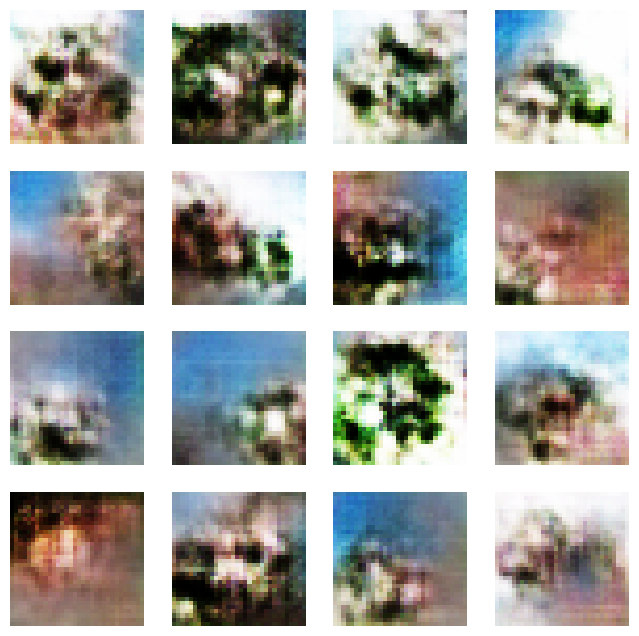

In [8]:
from keras.models import load_model

plt.figure(figsize=(8, 8))
def show_plot(examples, n):
    for i in range(n * n):
        plt.subplot(n, n, i + 1)
        plt.axis('off')
        plt.imshow(examples[i, :, :, :])
    plt.show()
    
model = load_model('cifar_generator_model.h5', compile=False)
latent_points = generate_latent_points(100, 16)
X = ((model.predict(latent_points) + 1) / 2.0 * 255).astype(np.uint8)

show_plot(X, 4)